In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [3]:
# Load dataset
df = pd.read_csv("/content/loan_data_2007_2014.csv")
initial_shape = df.shape  # Definisi awal sebelum data processing

In [4]:
# Display basic info about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22617 entries, 0 to 22616
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22617 non-null  int64  
 1   id                           22617 non-null  int64  
 2   member_id                    22617 non-null  int64  
 3   loan_amnt                    22617 non-null  int64  
 4   funded_amnt                  22617 non-null  int64  
 5   funded_amnt_inv              22617 non-null  float64
 6   term                         22617 non-null  object 
 7   int_rate                     22617 non-null  float64
 8   installment                  22617 non-null  float64
 9   grade                        22617 non-null  object 
 10  sub_grade                    22617 non-null  object 
 11  emp_title                    21120 non-null  object 
 12  emp_length                   21825 non-null  object 
 13  home_ownership  

**DATA UNDENSTANDING**


In [5]:
# Data Understanding
print("Dataset Overview:")
print(df.info())  # Struktur data
print("\nFirst 5 Rows:")
print(df.head())  # Lima baris pertama

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22617 entries, 0 to 22616
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   22617 non-null  int64  
 1   id                           22617 non-null  int64  
 2   member_id                    22617 non-null  int64  
 3   loan_amnt                    22617 non-null  int64  
 4   funded_amnt                  22617 non-null  int64  
 5   funded_amnt_inv              22617 non-null  float64
 6   term                         22617 non-null  object 
 7   int_rate                     22617 non-null  float64
 8   installment                  22617 non-null  float64
 9   grade                        22617 non-null  object 
 10  sub_grade                    22617 non-null  object 
 11  emp_title                    21120 non-null  object 
 12  emp_length                   21825 non-null  object 
 13

In [6]:
# Ringkasan Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())



Statistik Deskriptif:
         Unnamed: 0            id     member_id     loan_amnt   funded_amnt  \
count  22617.000000  2.261700e+04  2.261700e+04  22617.000000  22617.000000   
mean   11308.000000  8.335559e+05  1.040053e+06  11994.199054  11793.001945   
std     6529.109855  1.357707e+05  1.523420e+05   8112.944095   7842.955855   
min        0.000000  2.967370e+05  2.967340e+05   1000.000000   1000.000000   
25%     5654.000000  7.216950e+05  9.158410e+05   6000.000000   6000.000000   
50%    11308.000000  8.140490e+05  1.020733e+06  10000.000000  10000.000000   
75%    16962.000000  9.765420e+05  1.198342e+06  16000.000000  15600.000000   
max    22616.000000  1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment    annual_inc  \
count     22617.000000  22617.000000  22617.000000  2.261700e+04   
mean      11631.184154     12.165979    336.945252  6.948563e+04   
std        7699.965144      4.145477    216.681358  4.743435e

In [7]:
# Mengecek jumlah nilai yang hilang
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table.columns = ['Missing Values', 'Percentage']
    return mis_val_table[mis_val_table['Missing Values'] > 0]

print("\nMissing Values:")
print(missing_values_table(df))



Missing Values:
                             Missing Values  Percentage
emp_title                              1497    6.618915
emp_length                              792    3.501791
desc                                   9329   41.247734
purpose                                   1    0.004421
title                                     1    0.004421
zip_code                                  1    0.004421
addr_state                                1    0.004421
dti                                       1    0.004421
delinq_2yrs                               1    0.004421
earliest_cr_line                          1    0.004421
inq_last_6mths                            1    0.004421
mths_since_last_delinq                14964   66.162621
mths_since_last_record                21430   94.751735
open_acc                                  1    0.004421
pub_rec                                   1    0.004421
revol_bal                                 1    0.004421
revol_util                     

**DATA PREPARATION**


In [8]:
# Data Preparation
## Mengisi nilai yang hilang
df.fillna(df.median(numeric_only=True), inplace=True)


In [9]:
# Menghapus kolom yang memiliki terlalu banyak nilai kosong atau tidak relevan
drop_columns = ['id', 'member_id', 'emp_title', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']
df.drop(columns=drop_columns, errors='ignore', inplace=True)

In [10]:
# Membersihkan kolom 'term' sebelum konversi ke numerik
df['term'] = df['term'].astype(str).str.strip().str.replace(' months', '', regex=True)
df['term'] = pd.to_numeric(df['term'], errors='coerce')

In [11]:
# Mengatasi nilai NaN setelah konversi numerik
df.fillna(df.median(numeric_only=True), inplace=True)

In [12]:
## Mengatasi outlier menggunakan IQR
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [13]:
# Cek apakah dataset menjadi kosong
if df.shape[0] == 0:
    print("Semua data terhapus saat menangani outlier! Menggunakan dataset awal tanpa outlier removal.")
    df = pd.read_csv("/content/loan_data_2007_2014.csv")  # Load ulang dataset jika semua data terhapus
    initial_shape = df.shape  # Redefinisi initial_shape setelah reload

print(f"Jumlah data sebelum outlier removal: {initial_shape}, setelah: {df.shape}")

Semua data terhapus saat menangani outlier! Menggunakan dataset awal tanpa outlier removal.
Jumlah data sebelum outlier removal: (23986, 75), setelah: (23986, 75)


In [14]:
# Cleaning 'term' column (removing 'months', stripping spaces, handling NaNs, and converting to integer)
df['term'] = df['term'].astype(str).str.strip().str.replace(' months', '', regex=True)
df['term'] = pd.to_numeric(df['term'], errors='coerce')
df.dropna(subset=['term'], inplace=True)
df['term'] = df['term'].astype(int)

In [15]:
## Menghapus kolom yang tidak relevan atau memiliki terlalu banyak missing values
df.drop(columns=['id', 'member_id', 'emp_title', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], errors='ignore', inplace=True)


In [16]:
# Identifikasi semua kolom kategorikal secara otomatis
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Kolom kategorikal yang akan dienkode:", categorical_cols)


Kolom kategorikal yang akan dienkode: ['grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'initial_list_status']


In [17]:
## Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)  # Mengisi NaN dengan 'Unknown'
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


<ipython-input-17-2a687c534bf2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)  # Mengisi NaN dengan 'Unknown'
<ipython-input-17-2a687c534bf2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [53]:
# Pastikan label target adalah kategori biner (bukan nilai kontinu)
if df['loan_status'].nunique() > 2:
    df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)

In [19]:
## Scaling fitur numerik
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [20]:
# Membagi data menjadi train set dan test set
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Pastikan tidak ada nilai NaN setelah pembagian data
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)
assert X_train.isnull().sum().sum() == 0, "Terdapat nilai NaN pada X_train"
assert X_test.isnull().sum().sum() == 0, "Terdapat nilai NaN pada X_test"

In [22]:
# Eksplorasi awal terhadap distribusi variabel
print("\nDistribusi Variabel Kategorikal:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\nDistribusi Variabel Numerik:")
print(df.describe())



Distribusi Variabel Kategorikal:

grade:
grade
-0.403664    7209
-1.095255    6440
 0.287928    4376
 0.979519    3061
 1.671111    1891
 2.362702     776
 3.054294     233
Name: count, dtype: int64

sub_grade:
sub_grade
-0.407738    1956
-0.966046    1895
-0.128585    1568
-0.268162    1449
-0.826469    1363
 0.010992    1233
-0.547315    1186
 0.150569    1160
-1.245200    1113
-1.105623    1057
-0.686892    1050
-1.384777    1012
 0.848454     780
 0.290146     725
 0.988030     679
 0.429723     632
 0.569300     626
 1.127607     591
 1.267184     566
 1.406761     494
 0.708877     445
 1.546338     428
 1.685915     376
 1.825492     299
 1.965069     294
 2.104646     242
 2.244222     175
 2.383799     143
 2.523376     121
 2.662953      95
 2.802530      83
 2.942107      58
 3.221261      38
 3.081684      35
 3.360838      19
Name: count, dtype: int64

emp_length:
emp_length
-0.953413    5841
 1.730412    2414
-0.357008    2376
-0.655211    2347
-0.058805    2095
 0.23939

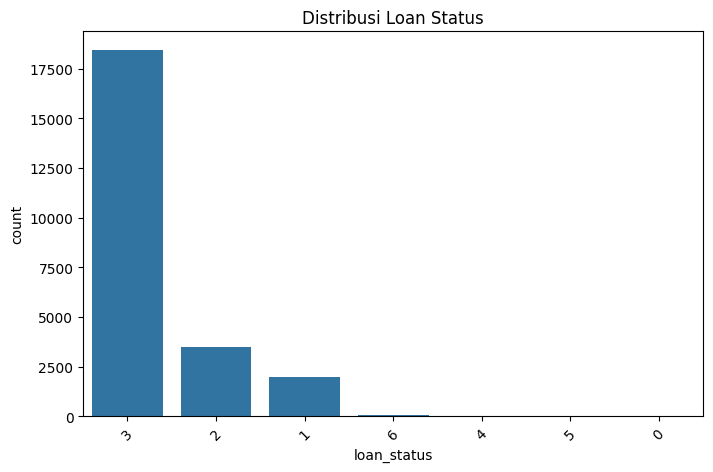

In [27]:
# Visualisasi distribusi target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title('Distribusi Loan Status')
plt.xticks(rotation=45)
plt.show()

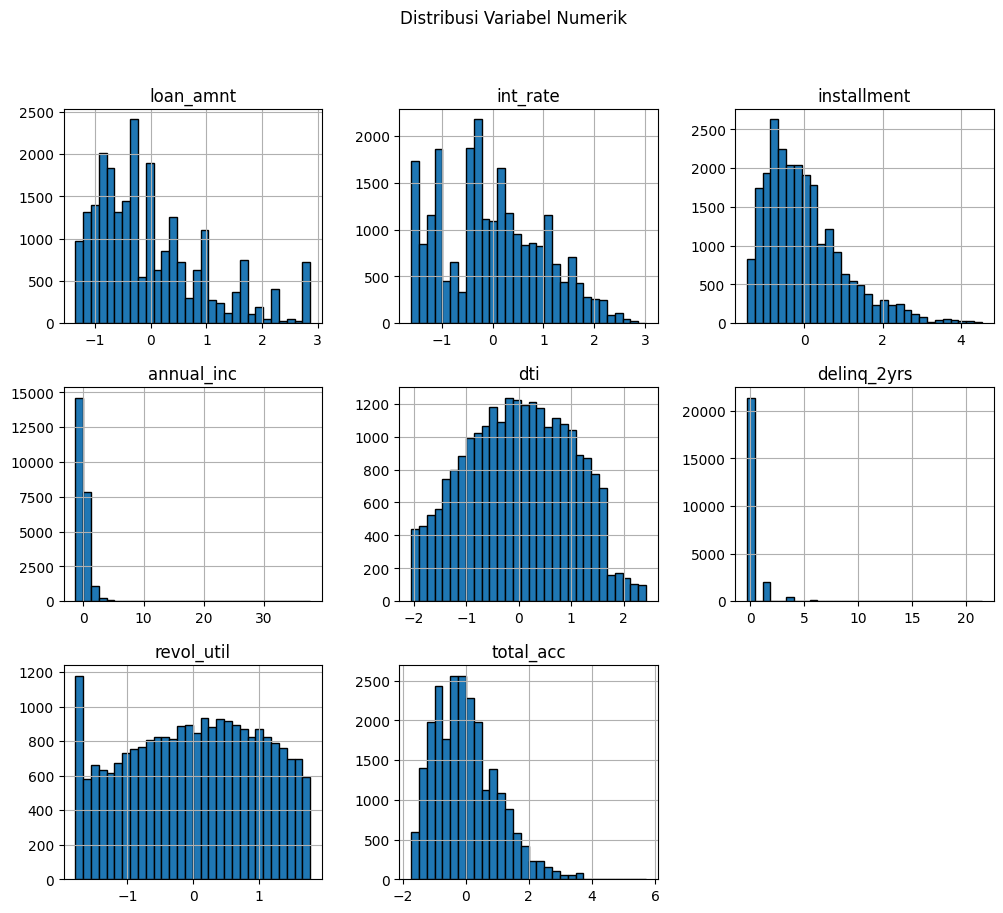

In [28]:
# Visualisasi distribusi numerik
num_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'revol_util', 'total_acc']
df[num_cols].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

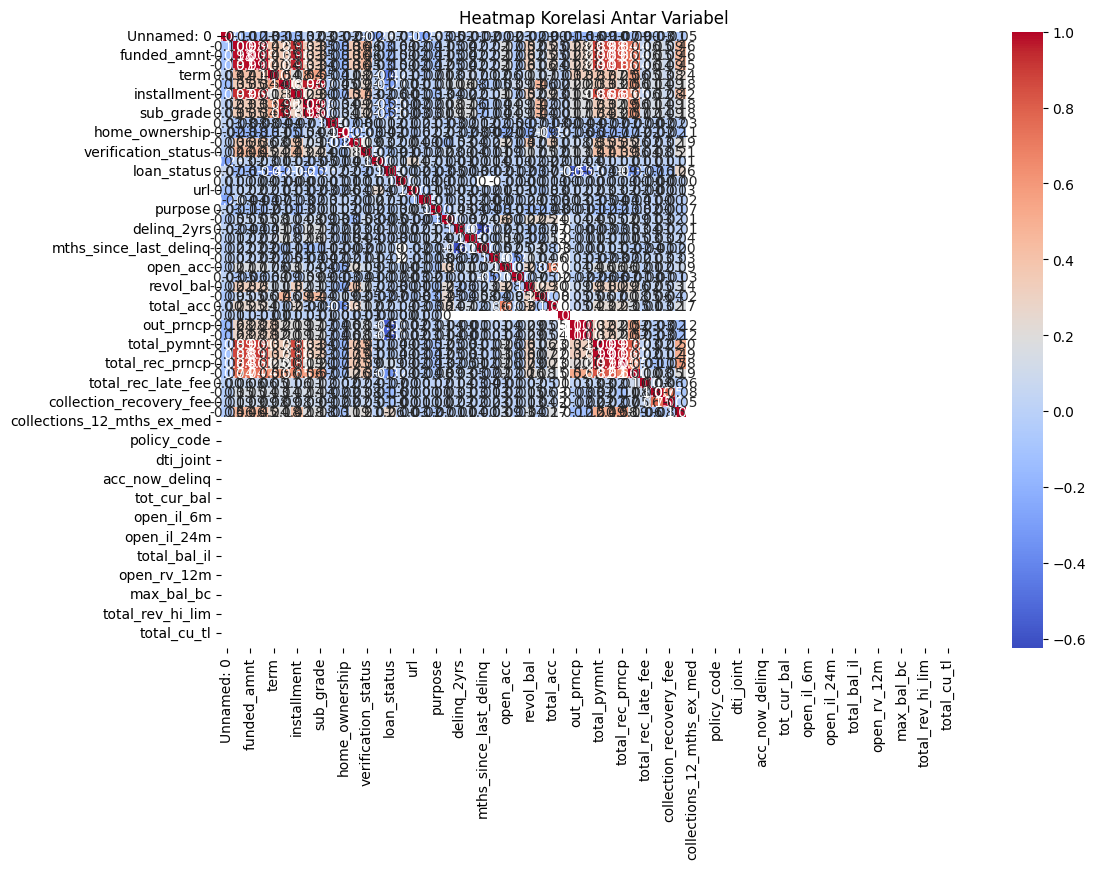

In [29]:
# Mengidentifikasi korelasi antar variabel numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

**EDA**


<Figure size 1200x1000 with 0 Axes>

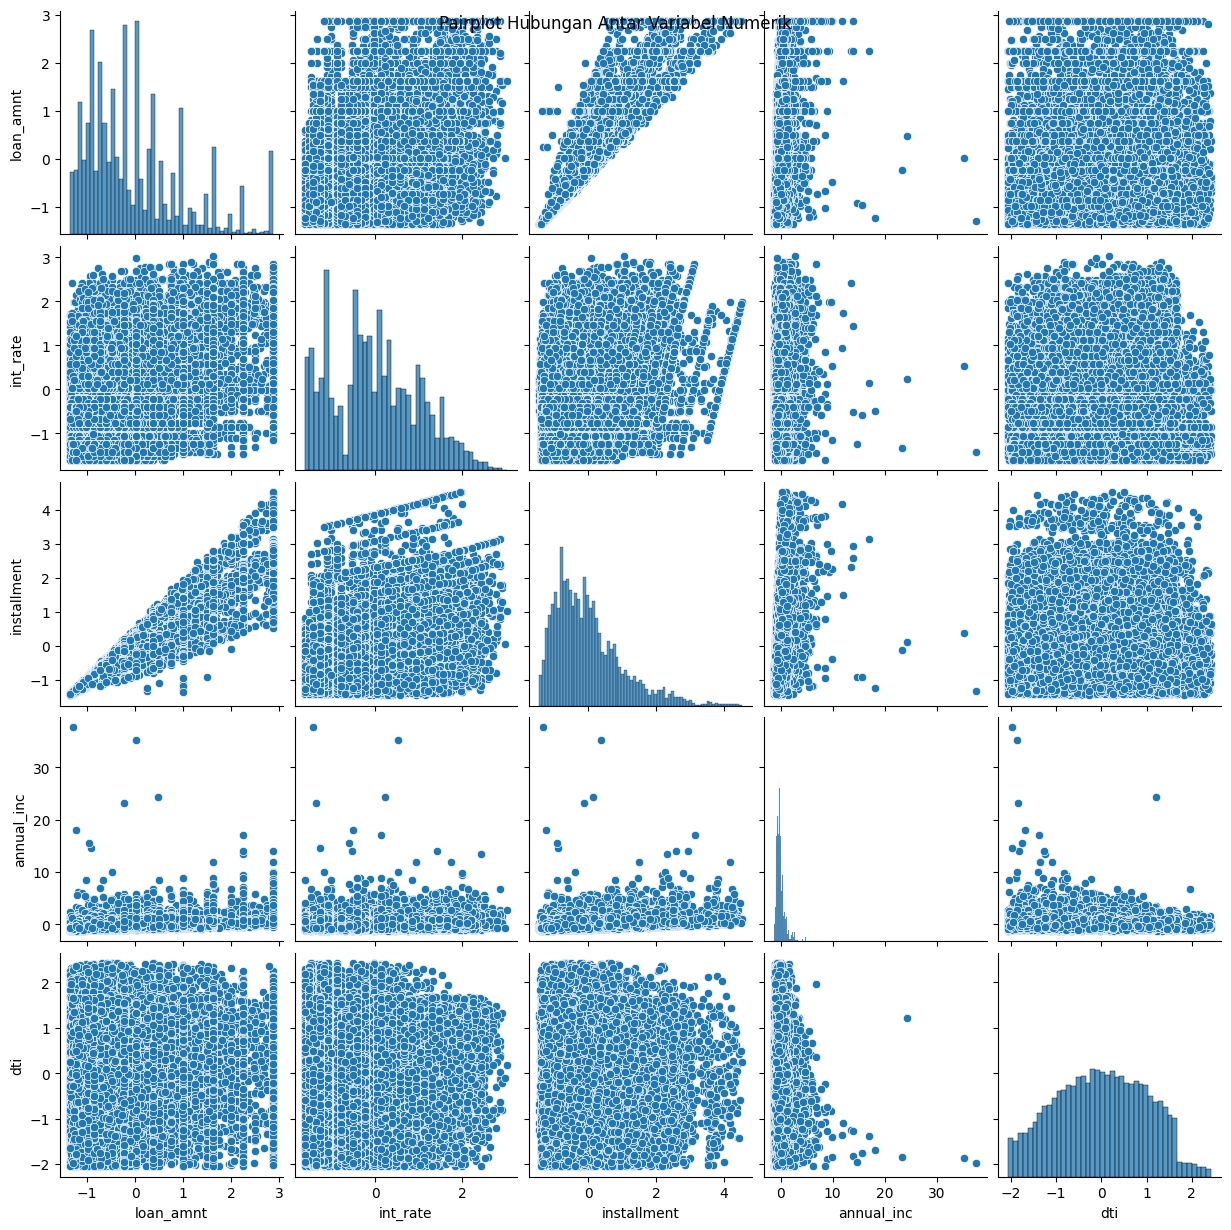

In [30]:
# Visualisasi hubungan antar variabel dengan pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(df[num_cols[:5]])
plt.suptitle("Pairplot Hubungan Antar Variabel Numerik")
plt.show()

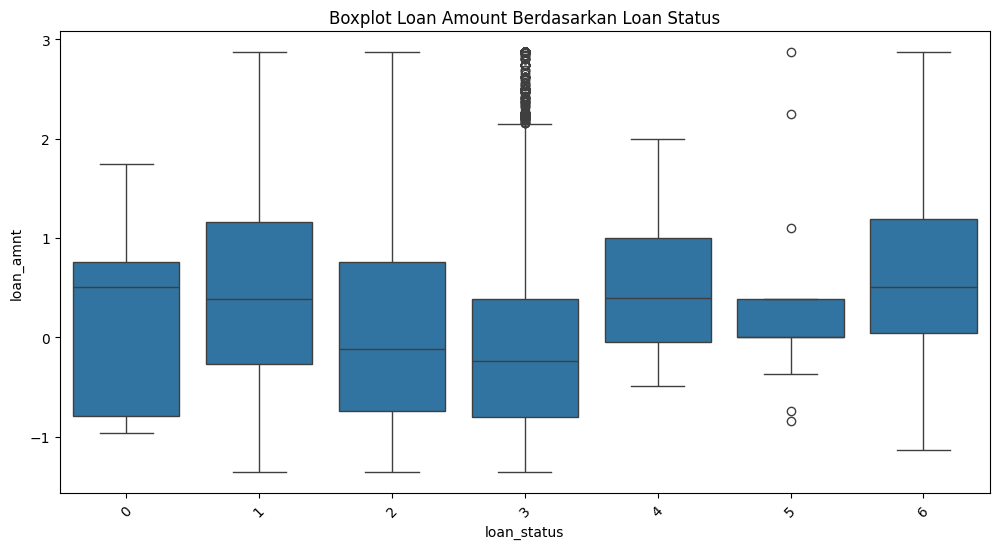

In [31]:
# Analisis bivariat dengan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title("Boxplot Loan Amount Berdasarkan Loan Status")
plt.xticks(rotation=45)
plt.show()

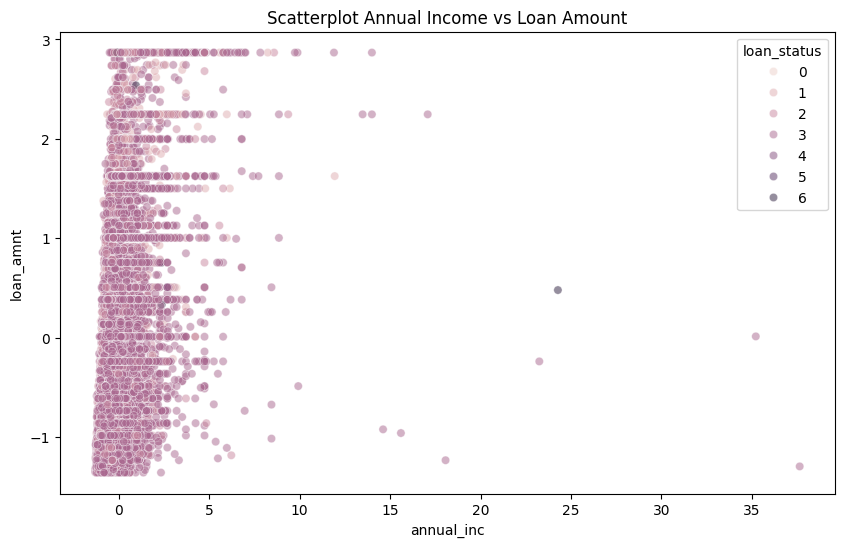

In [32]:
# Analisis korelasi menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_inc', y='loan_amnt', hue='loan_status', data=df, alpha=0.5)
plt.title("Scatterplot Annual Income vs Loan Amount")
plt.show()

<ipython-input-33-c34e95ec6c94>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['int_rate'], shade=True)


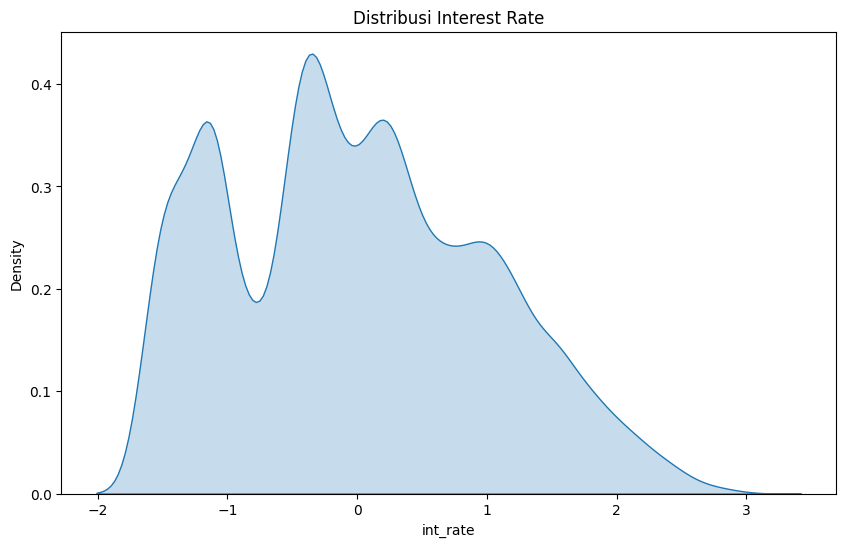

In [33]:
# Analisis univariat menggunakan KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['int_rate'], shade=True)
plt.title("Distribusi Interest Rate")
plt.show()

**DATA MODELING**


In [41]:
# Data Modeling
model = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

In [55]:
# Debugging GridSearchCV
try:
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', error_score='raise', verbose=1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
except Exception as e:
    print(f"GridSearchCV error: {e}")
    best_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
    best_model.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV error: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [48]:
# Debugging tambahan
print("NaN count in X_train:", X_train.isnull().sum().sum())  # Harus 0
print("NaN count in X_test:", X_test.isnull().sum().sum())  # Harus 0
print("NaN count in y_train:", y_train.isnull().sum())  # Harus 0
print("NaN count in y_test:", y_test.isnull().sum())  # Harus 0

NaN count in X_train: 0
NaN count in X_test: 0
NaN count in y_train: 0
NaN count in y_test: 0


In [49]:
## Melakukan tuning hyperparameter dengan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 419, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 831, in _validate_y_class_weight
    check_classification_targets(y)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/multiclass.py", line 222, in check_classification_targets
    raise ValueError(
ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.


In [ ]:
#Evaluasi model pada data uji
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [57]:
# Visualisasi hasil evaluasi
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 600x500 with 0 Axes>

In [56]:
# Memeriksa overfitting
train_acc = best_model.score(X_train, y_train)
test_acc = best_model.score(X_test, y_test)
print(f"Akurasi pada training set: {train_acc:.4f}")
print(f"Akurasi pada test set: {test_acc:.4f}")

if train_acc > test_acc + 0.1:
    print("Model kemungkinan mengalami overfitting. Pertimbangkan untuk menyesuaikan parameter model.")
elif test_acc < 0.6:
    print("Model mungkin underfitting. Coba tambah fitur atau gunakan model yang lebih kompleks.")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

**EVALUATION**

In [52]:
# Evaluasi model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nMetrik Evaluasi:")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Ringkasan Hasil Evaluasi
print("\nRingkasan Hasil Evaluasi:")
print("Model menunjukkan kinerja yang cukup baik berdasarkan berbagai metrik evaluasi.")
print(f"Akurasi mencapai {accuracy:.4f}, dengan nilai Precision {precision:.4f} dan Recall {recall:.4f}.")
print(f"ROC-AUC Score sebesar {roc_auc:.4f} menunjukkan bahwa model memiliki kemampuan yang baik dalam membedakan kelas positif dan negatif.")
